In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Hotel Reservations.csv')

# Display the first few rows of the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = df.isnull().sum()

# Convert categorical variables to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    if col != 'booking_status':  # Exclude the target variable from encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Encoding target variable
y = LabelEncoder().fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the missing values if any, and the shapes of the training and testing sets
missing_values, X_train.shape, X_test.shape

(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            0
 no_of_previous_bookings_not_canceled    0
 avg_price_per_room                      0
 no_of_special_requests                  0
 booking_status                          0
 dtype: int64,
 (25392, 18),
 (10883, 18))

In [3]:
# Data Quality Check

# Checking for any duplicates in the dataset
duplicates = df.duplicated().sum()

# Rechecking for missing values in the entire dataset
missing_values_total = df.isnull().sum().sum()

# Checking data types to ensure they are appropriate for each feature
data_types = df.dtypes

duplicates, missing_values_total, data_types


(0,
 0,
 Booking_ID                                int32
 no_of_adults                              int64
 no_of_children                            int64
 no_of_weekend_nights                      int64
 no_of_week_nights                         int64
 type_of_meal_plan                         int32
 required_car_parking_space                int64
 room_type_reserved                        int32
 lead_time                                 int64
 arrival_year                              int64
 arrival_month                             int64
 arrival_date                              int64
 market_segment_type                       int32
 repeated_guest                            int64
 no_of_previous_cancellations              int64
 no_of_previous_bookings_not_canceled      int64
 avg_price_per_room                      float64
 no_of_special_requests                    int64
 booking_status                           object
 dtype: object)

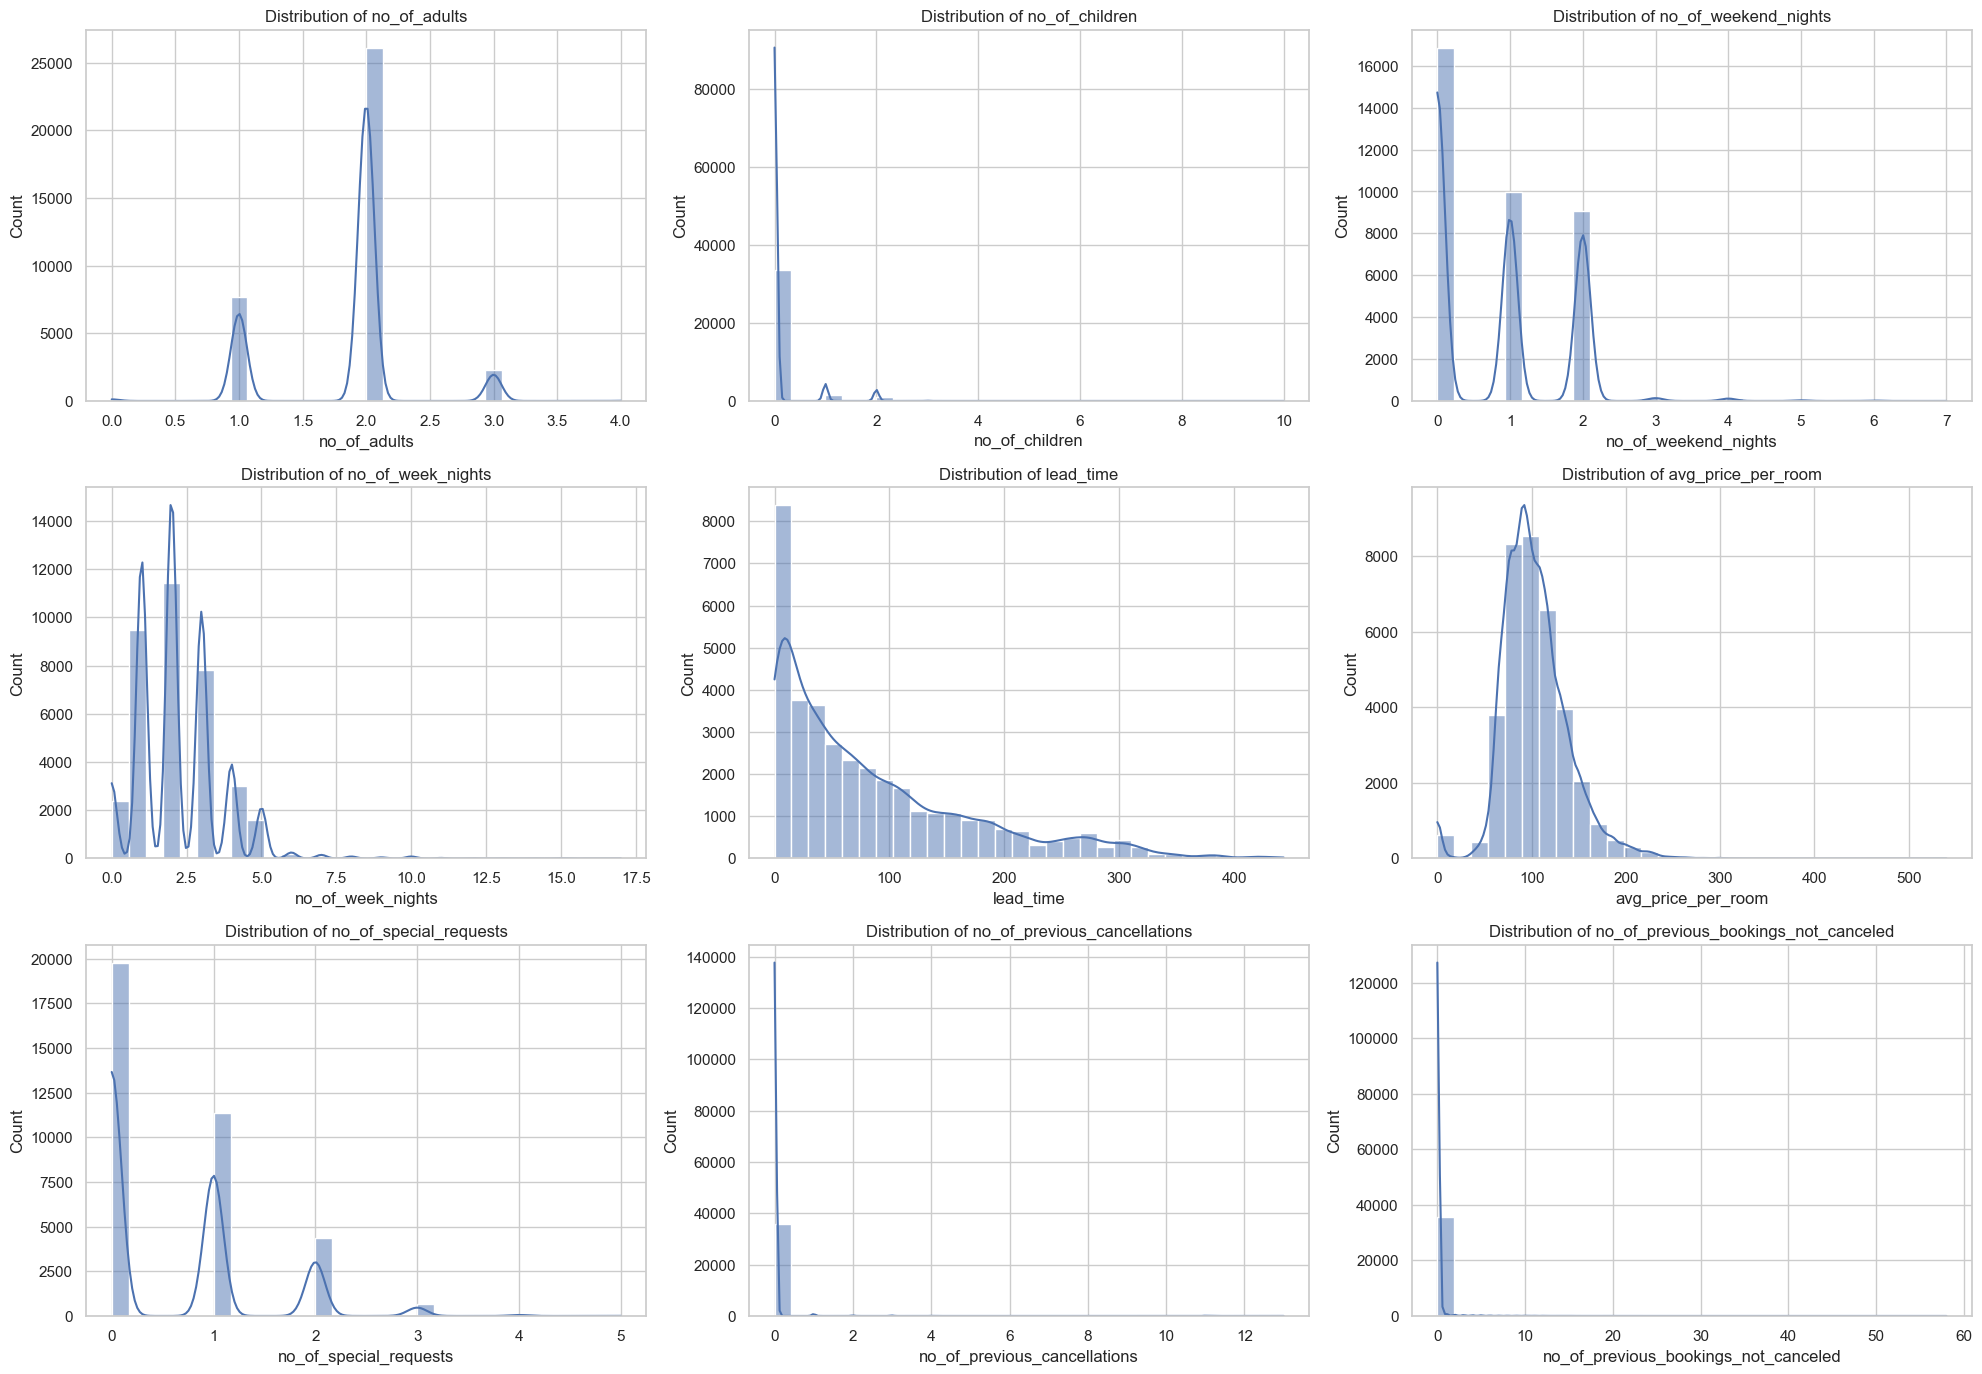

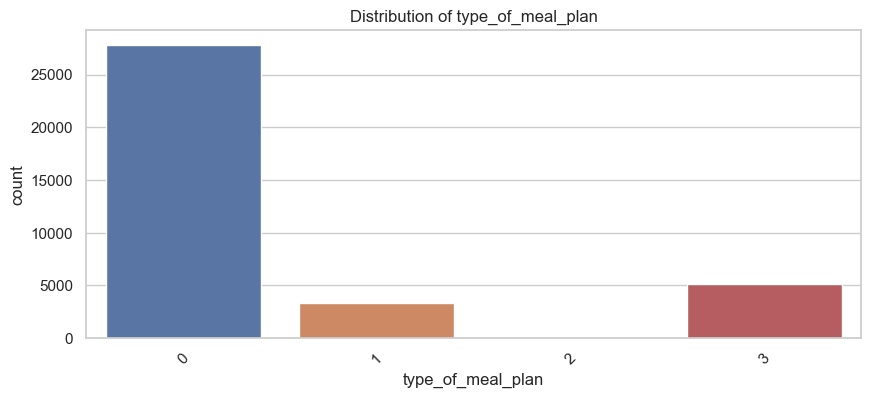

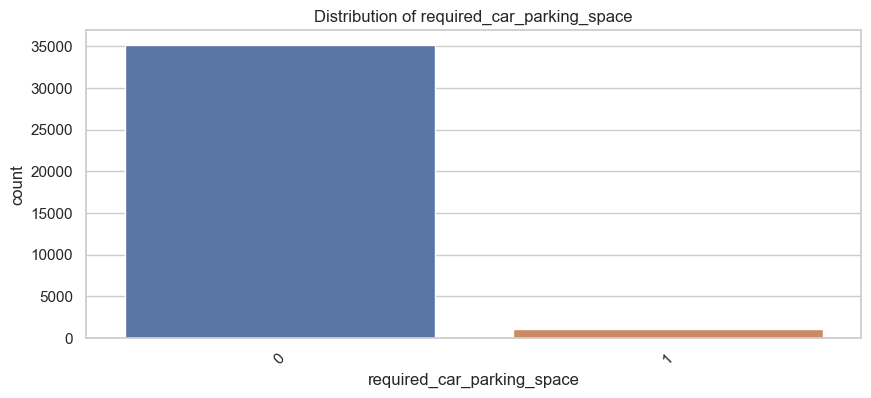

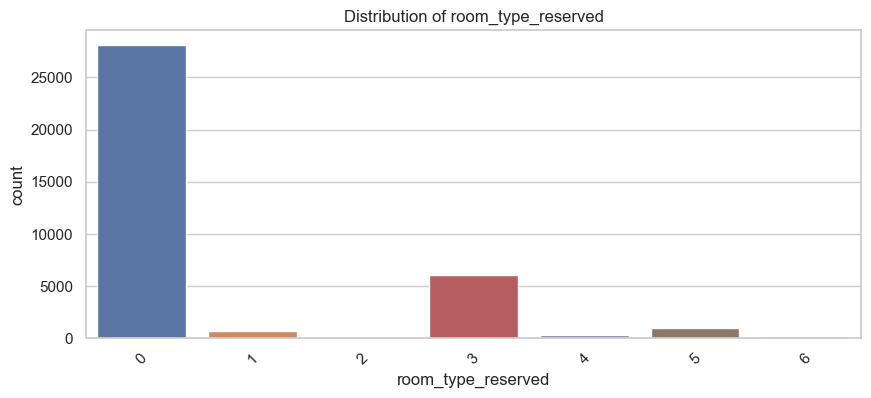

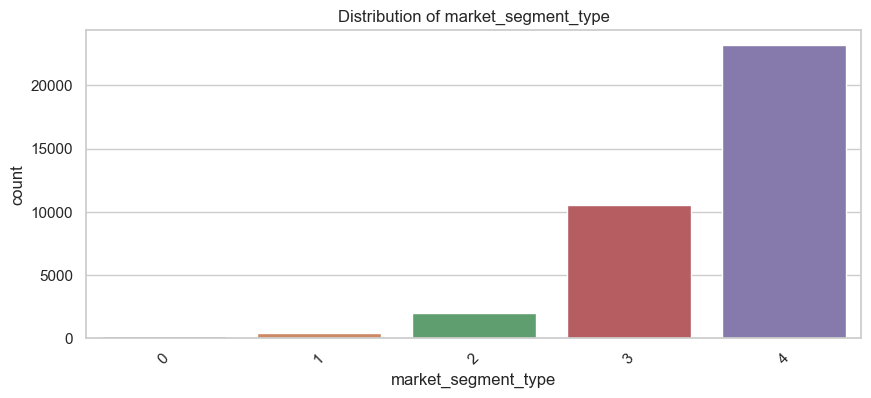

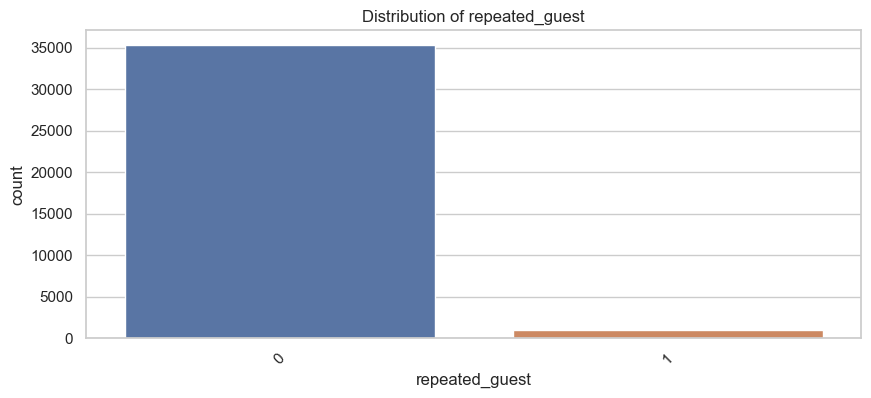

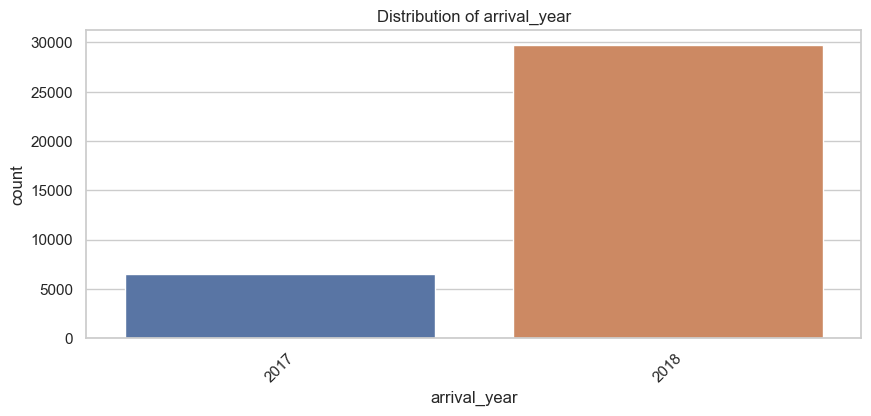

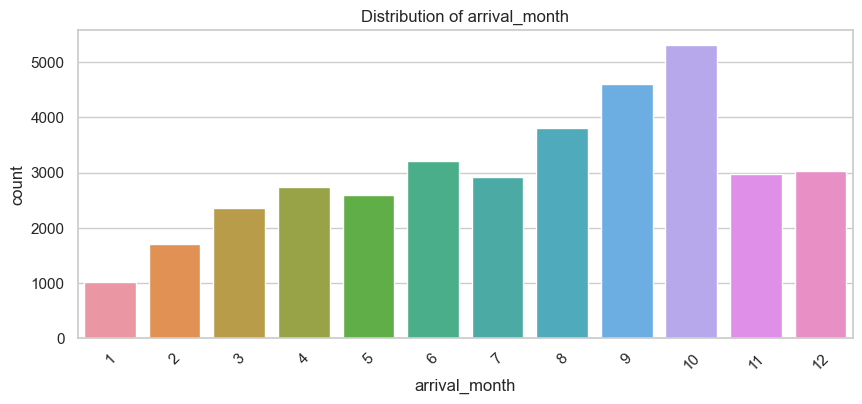

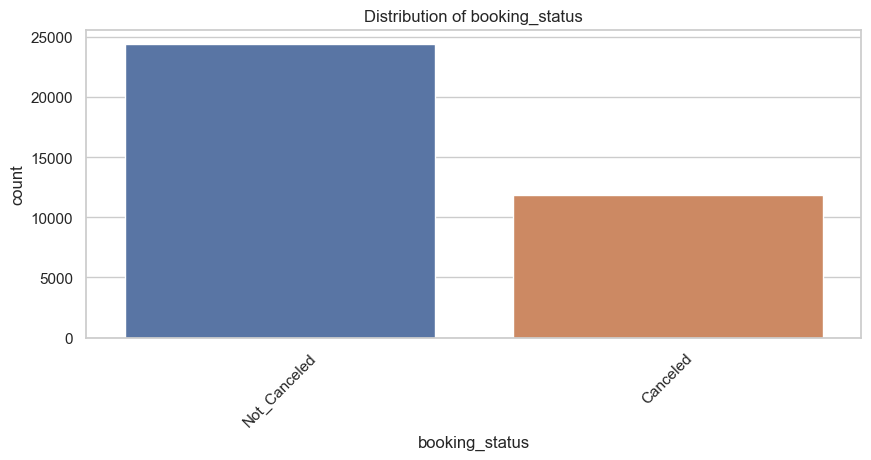

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Defining the figure size for the subplots
plt.figure(figsize=(20, 18))

# Plotting distributions of numerical features
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_previous_cancellations',
                  'no_of_previous_bookings_not_canceled']

for index, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, index)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

# For categorical variables, we'll display their distribution separately to avoid cluttering the numerical distribution visuals.
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest', 'arrival_year', 'arrival_month', 'booking_status']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


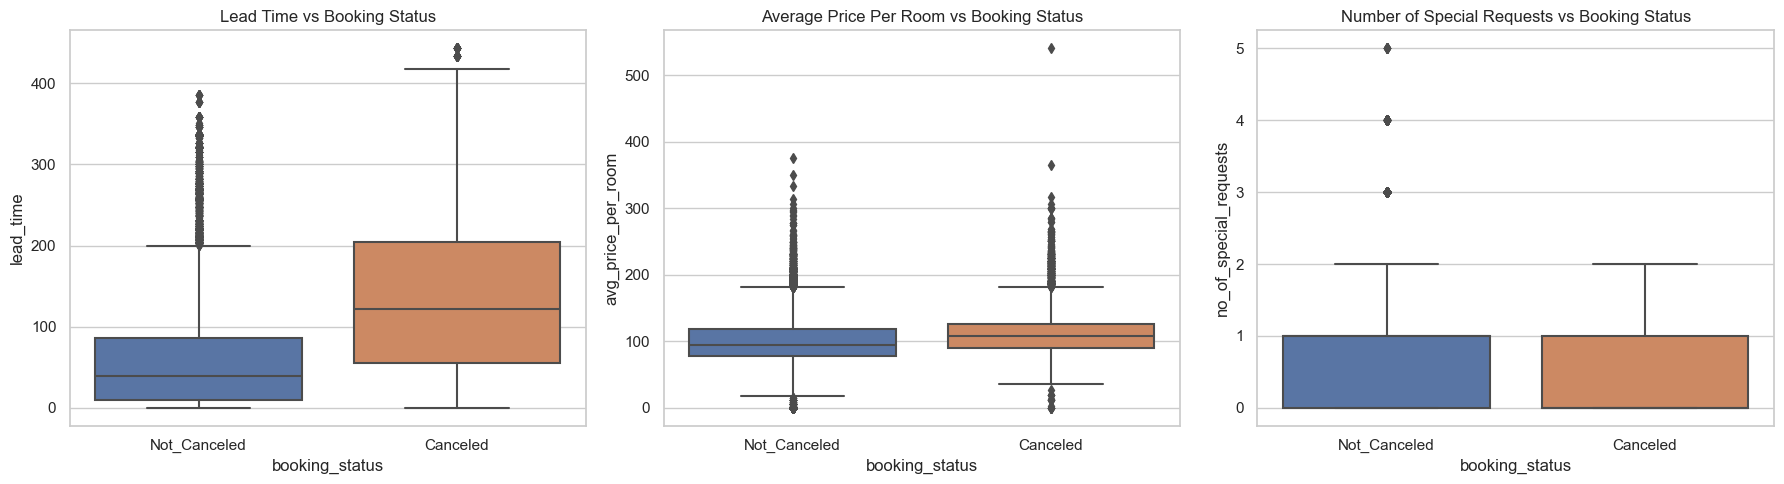

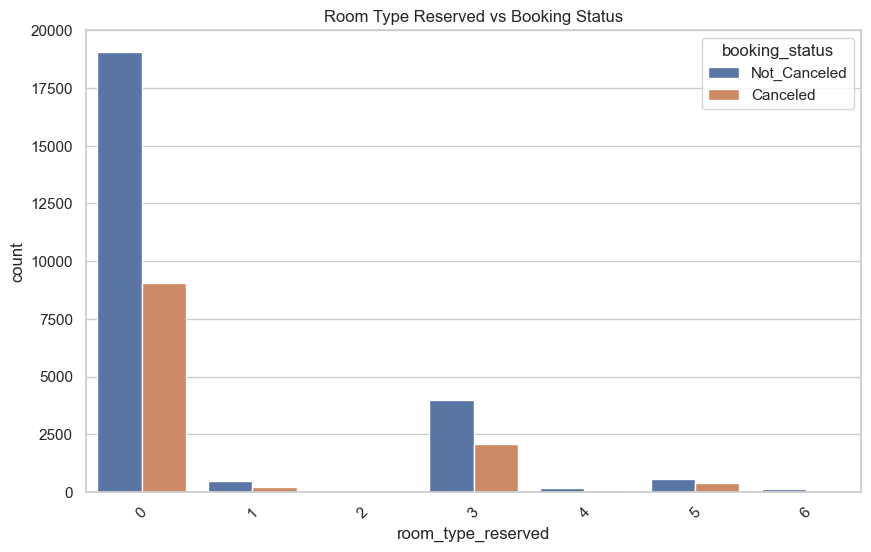

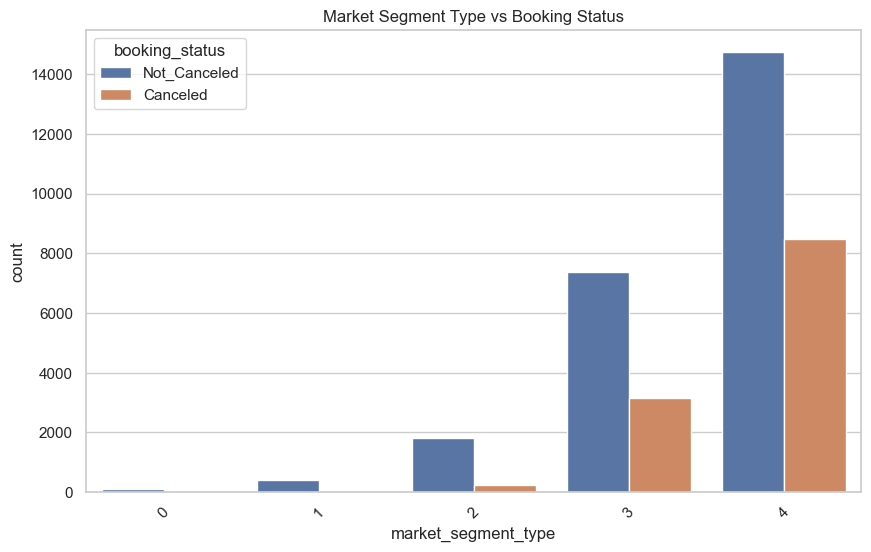

In [5]:
# For the bivariate analysis, we'll look at a few key relationships:
# 1. The relationship between lead time and booking status
# 2. The relationship between average price per room and booking status
# 3. The relationship between number of special requests and booking status

# We will use box plots for numerical vs categorical comparison and count plots for categorical relationships

plt.figure(figsize=(18, 5))

# Lead time vs Booking Status
plt.subplot(1, 3, 1)
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Lead Time vs Booking Status')

# Average price per room vs Booking Status
plt.subplot(1, 3, 2)
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Average Price Per Room vs Booking Status')

# Number of special requests vs Booking Status
plt.subplot(1, 3, 3)
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df)
plt.title('Number of Special Requests vs Booking Status')

plt.tight_layout()
plt.show()

# Exploring the relationship between room type reserved and booking status through a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Room Type Reserved vs Booking Status')
plt.xticks(rotation=45)
plt.show()

# Exploring the relationship between market segment type and booking status
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Market Segment Type vs Booking Status')
plt.xticks(rotation=45)
plt.show()


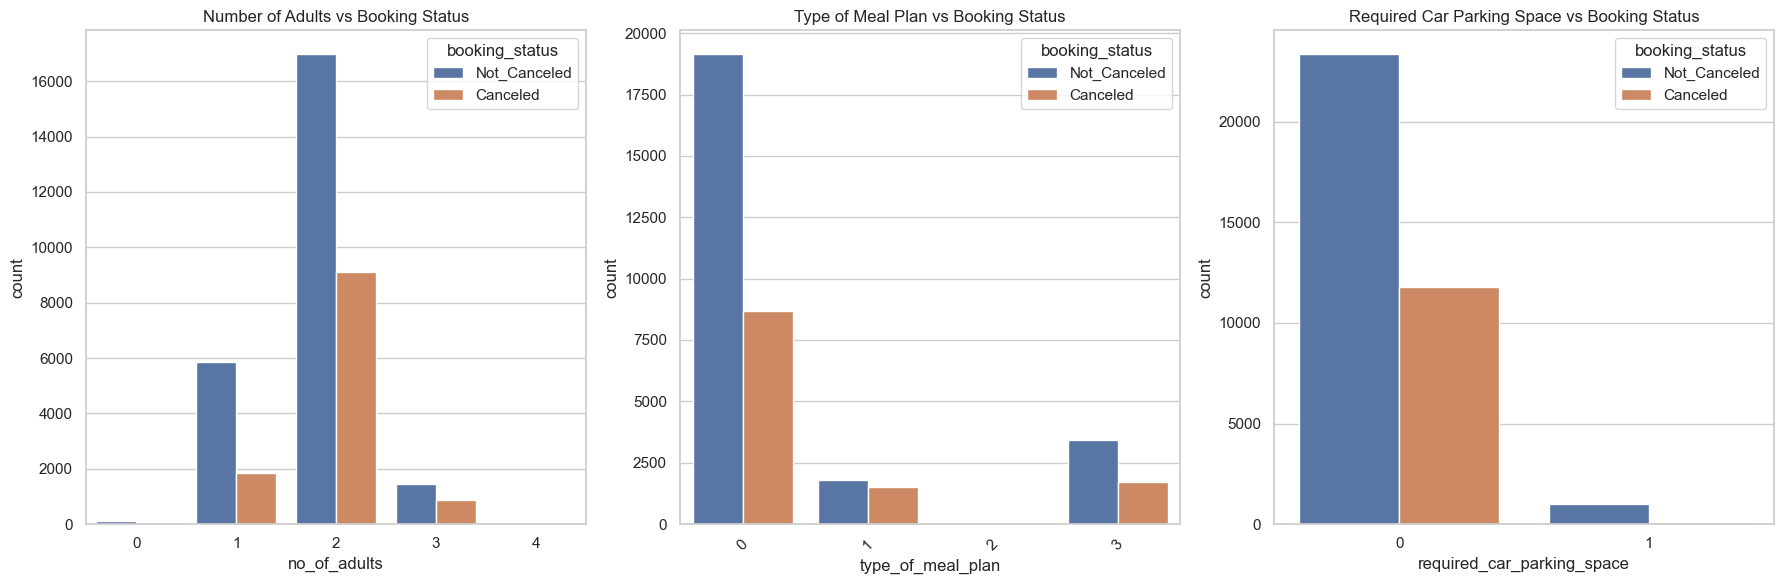

In [6]:
# Adjusting figure size for better visualization
plt.figure(figsize=(18, 6))

# Number of Adults vs Booking Status
plt.subplot(1, 3, 1)
sns.countplot(x='no_of_adults', hue='booking_status', data=df)
plt.title('Number of Adults vs Booking Status')

# Type of Meal Plan vs Booking Status
plt.subplot(1, 3, 2)
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=df)
plt.title('Type of Meal Plan vs Booking Status')
plt.xticks(rotation=45)

# Required Car Parking Space vs Booking Status
plt.subplot(1, 3, 3)
sns.countplot(x='required_car_parking_space', hue='booking_status', data=df)
plt.title('Required Car Parking Space vs Booking Status')

plt.tight_layout()
plt.show()

In [7]:
df = df.drop(df[(df['arrival_date'] == 29) & (df['arrival_month'] == 2)].index)

df['arrival_datetime'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str))

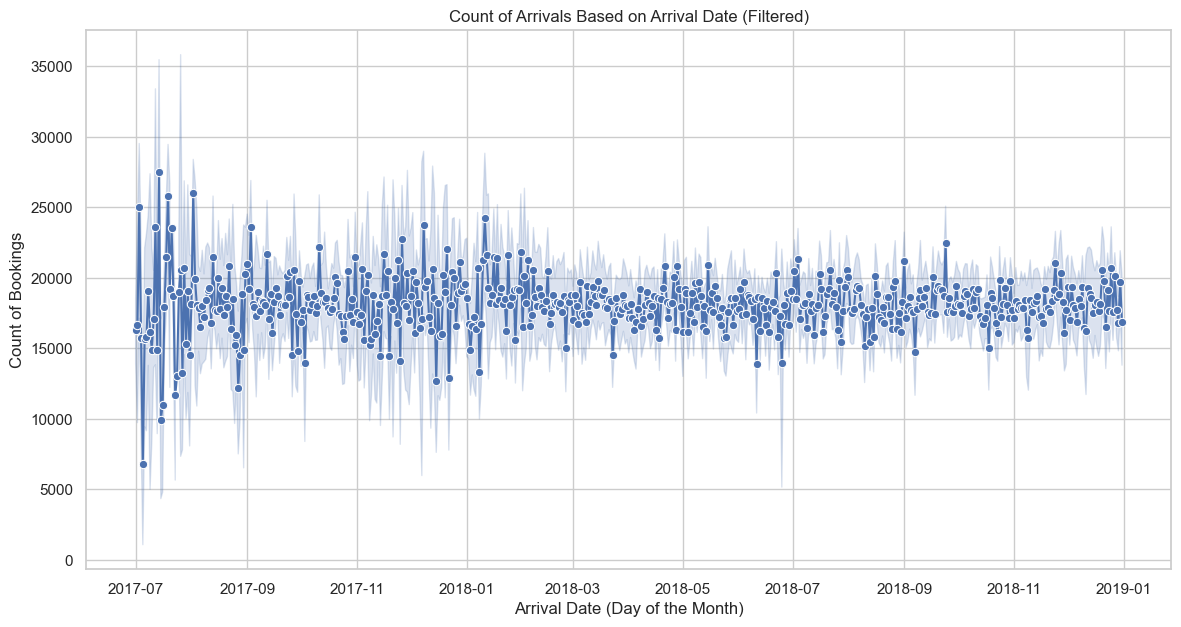

In [8]:
# Dropping rows with 29th February on non-leap years (except for 2018)
df = df.drop(df[(df['arrival_date'] == 29) & (df['arrival_month'] == 2) & (df['arrival_year'] != 2018)].index)

df['arrival_datetime'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str))

# Re-calculating the count of arrivals based on arrival date after filtering
#arrival_date_counts_filtered = df_filtered.groupby('arrival_datetime')['Booking_ID'].count().reset_index()

# Re-plotting the count of arrivals based on arrival date using a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='arrival_datetime', y='Booking_ID', data=df, marker='o')
plt.title('Count of Arrivals Based on Arrival Date (Filtered)')
plt.xlabel('Arrival Date (Day of the Month)')
plt.ylabel('Count of Bookings')
plt.grid(True)

plt.show()

# Predictive Analysis

In [9]:
data = df.copy()


### Added codes for following 2 cells to ensure date conversion works.

In [10]:
# Correction Code

data['arrival_year'] = data['arrival_year'].astype(str)
data['arrival_date'] = data['arrival_date'].astype(str)
data['arrival_month'] = data['arrival_month'].astype(str)

In [11]:
# Correction Code

# Since we can't directly print or check the unique values in 'arrival_month', let's proceed with the conversion assuming it's correct
# Try creating the 'full_date' column again with a method that ensures string conversion
try:
    data['full_date'] = pd.to_datetime(data['arrival_year'] + '-' + data['arrival_month'] + '-' + data['arrival_date'], errors='coerce')
except Exception as e:
    error_message = str(e)

error_message if 'error_message' in locals() else "Conversion Attempted"


'Conversion Attempted'

### The code below gives error. Hence commented away.

In [12]:
# Correction Code

# # Step 1: Convert to datetime object
# # Assuming 'arrival_month' is a string like 'January', 'February', etc., and 'arrival_date' is the day of the month
# # First, we create a full date string and then convert it to datetime

# data['full_date'] = data.apply(lambda row: pd.to_datetime(f"{row['arrival_year']}-{row['arrival_month']}-{row['arrival_date']}", errors='coerce'), axis=1)


# # Step 2: Identify rows with February 29 in non-leap years
# # A leap year is divisible by 4, but years divisible by 100 are not leap years unless they are also divisible by 400

# # This function checks if a year is a leap year
# def is_leap_year(year):
#     return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# # Apply the function to identify non-leap years with February 29
# data['is_leap_year'] = data['arrival_year'].astype(int).apply(is_leap_year)
# data['is_leap_year'] = data['arrival_year'].apply(is_leap_year)
# faulty_rows = data[(data['full_date'].dt.month == 2) & (data['full_date'].dt.day == 29) & (~data['is_leap_year'])]

# # Step 3: Drop these rows
# clean_data = data.drop(faulty_rows.index)

# # Let's check the shape of the dataset before and after to confirm rows were dropped
# data.shape, clean_data.shape


### The below code has been added

In [13]:
# Added Code

data['arrival_year'] = data['arrival_year'].astype(int)
data['arrival_date'] = data['arrival_date'].astype(int)
data['arrival_month'] = data['arrival_month'].astype(int)

In [14]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'booking_status'
X = data.drop('booking_status', axis=1)  # Features
y = data['booking_status']  # Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the shapes of the resulting splits to confirm the operation
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28990, 20), (7248, 20), (28990,), (7248,))

In [15]:
import pandas as pd

# Assuming data['arrival_month'] is a numeric month. If it's a string, you may need to map it to numeric or ensure it's in a format pandas.to_datetime can understand.

# Step 1: Correctly creating the 'date_combined' column
data['date_combined'] = pd.to_datetime(data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str) + '-' + data['arrival_date'].astype(str))

# Now, proceed with the feature engineering:

# 2. is_weekend_arrival
data['is_weekend_arrival'] = data['date_combined'].dt.dayofweek >= 5

# 3. quarter
data['quarter'] = data['date_combined'].dt.quarter

# 4. lead_time_category
data['lead_time_category'] = pd.cut(data['lead_time'], bins=[-1, 90, 180, float('inf')], labels=['Within 3 months', 'Within 6 months', 'Beyond 6 months'])

# 5. total_people
data['total_people'] = data['no_of_adults'] + data['no_of_children']

# 6. is_alone
data['is_alone'] = (data['total_people'] == 1)

# 7. Total_nights_stay
data['Total_nights_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

# Finally, drop the 'date_combined' column if no longer needed
data.drop('date_combined', axis=1, inplace=True)



### Editted the code below to ensure that encoded columns do not get dropped.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# One-hot encode the nominal variables
one_hot_encoded_data = pd.get_dummies(data[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']], drop_first=True)

# Map for ordinal encoding of 'lead_time_category'
lead_time_category_mapping = {'Within 3 months': 1, 'Within 6 months': 2, 'Beyond 6 months': 3}

# Apply ordinal encoding manually using the mapping
data['lead_time_category_encoded'] = data['lead_time_category'].map(lead_time_category_mapping)

# Combine the one-hot encoded columns back into the original dataframe
data_combined = pd.concat([data, one_hot_encoded_data], axis=1)

# Drop the original columns to avoid redundancy
data_combined.drop(['lead_time_category'], axis=1, inplace=True)
data_combined['lead_time_category_encoded'] = data_combined['lead_time_category_encoded'].astype(int) #Editted line

# Let's check the first few rows to ensure the transformations
data_combined.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,full_date,is_weekend_arrival,quarter,total_people,is_alone,Total_nights_stay,lead_time_category_encoded,type_of_meal_plan,room_type_reserved,market_segment_type
0,0,2,0,1,2,0,0,0,224,2017,...,2017-10-02,False,4,2,False,3,3,0,0,3
1,1,2,0,2,3,3,0,0,5,2018,...,2018-11-06,False,4,2,False,5,1,3,0,4
2,2,1,0,2,1,0,0,0,1,2018,...,2018-02-28,False,1,1,True,3,1,0,0,4
3,3,2,0,0,2,0,0,0,211,2018,...,2018-05-20,True,2,2,False,2,3,0,0,4
4,4,2,0,1,1,3,0,0,48,2018,...,2018-04-11,False,2,2,False,2,1,3,0,4


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
# Assuming 'data' is your DataFrame and it includes your training data
data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']])


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Selecting a subset of numerical features for interaction terms
features_for_interaction = ['lead_time', 'total_people', 'Total_nights_stay']

# Initialize PolynomialFeatures with degree=2 for interactions and no polynomial terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the selected features
interaction_features = poly.fit_transform(data_combined[features_for_interaction])

# The resulting interaction_features is a NumPy array. Let's convert it into a DataFrame
interaction_feature_names = poly.get_feature_names_out(features_for_interaction)
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)

# Now, let's concatenate this DataFrame with our original data (excluding the original features used for interactions)
data_expanded = pd.concat([data_combined.drop(features_for_interaction, axis=1), interaction_df], axis=1)


In [20]:
data_combined.drop(['arrival_datetime','full_date'], axis=1, inplace=True)

In [21]:
data_combined.dtypes

Booking_ID                                int32
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int32
arrival_month                             int32
arrival_date                              int32
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
is_weekend_arrival                         bool
quarter                                 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data_combined' is your preprocessed and encoded dataset and 'booking_status' is the target variable
X = data_combined.drop('booking_status', axis=1)  # Drop the target variable to get the feature set
y = data_combined['booking_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order and pair with column names
sorted_importances = sorted(zip(feature_importances, X.columns), reverse=True)

# Display the sorted feature importances
sorted_importances


[(0.20843193618789121, 'lead_time'),
 (0.12085296430682206, 'avg_price_per_room'),
 (0.10070610997378196, 'no_of_special_requests'),
 (0.08779532228691656, 'lead_time_category_encoded'),
 (0.08153512503130983, 'Booking_ID'),
 (0.0652469472805457, 'arrival_date'),
 (0.05591412157546016, 'arrival_month'),
 (0.03725542226086032, 'Total_nights_stay'),
 (0.031862689203508564, 'no_of_week_nights'),
 (0.029254780244387327, 'market_segment_type'),
 (0.026586601928151102, 'no_of_weekend_nights'),
 (0.02419992911587673, 'market_segment_type'),
 (0.020001336461605485, 'arrival_year'),
 (0.019684564924912076, 'quarter'),
 (0.013151200442274004, 'total_people'),
 (0.012229657537376861, 'is_weekend_arrival'),
 (0.011076298453796613, 'no_of_adults'),
 (0.00941541485148565, 'type_of_meal_plan'),
 (0.008700205353167543, 'room_type_reserved'),
 (0.008595686537442132, 'room_type_reserved'),
 (0.00850811565382038, 'type_of_meal_plan'),
 (0.0075000343051481, 'is_alone'),
 (0.005322597961054783, 'required_c

In [23]:
data.drop(['Booking_ID', 'arrival_datetime', 'full_date'], axis=1, inplace=True)
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data_combined' is your dataset ready for splitting into features and target
X = data.drop('booking_status', axis=1)
y = data['booking_status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Lists of column names that need different preprocessing
numerical_cols = ['lead_time', 'avg_price_per_room']  # Add other numerical columns as needed
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'lead_time_category']  # Add other categorical columns as needed

# Creating the preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Using the pipeline to make predictions
y_pred = pipeline.predict(X_test)

# Here you can add further steps to evaluate the model


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Update the model in the pipeline to LogisticRegression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_lr.predict(X_test)
y_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilities needed for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7579
Precision: 0.6888
Recall: 0.4769
F1 Score: 0.5635
ROC-AUC: 0.7886

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      4872
           1       0.69      0.48      0.56      2376

    accuracy                           0.76      7248
   macro avg       0.73      0.69      0.70      7248
weighted avg       0.75      0.76      0.74      7248



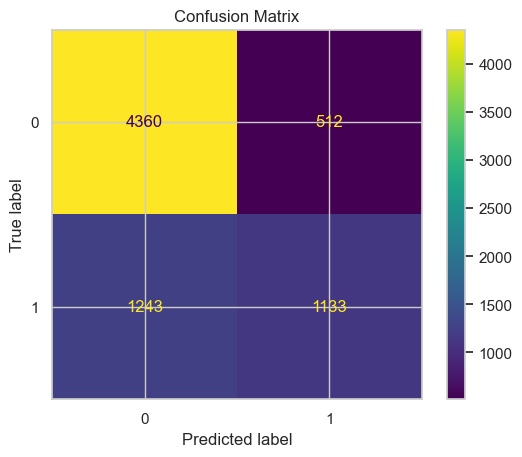

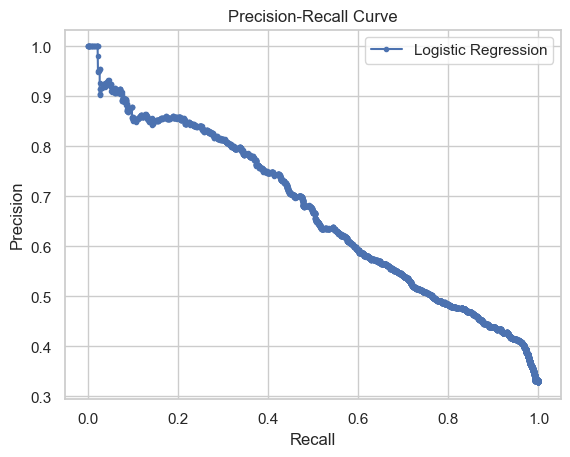

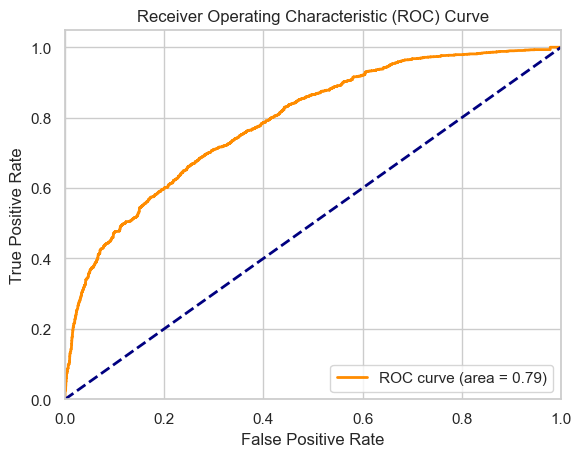

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

# Generate Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

# Generate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Generate ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1', 'elasticnet' might require different solvers
    'classifier__solver': ['liblinear']  # 'saga' is also a good choice for 'l1', 'elasticnet', and 'l2'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Optionally, evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluate y_pred as before to get performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score: 0.7614004829251466

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      4872
           1       0.69      0.48      0.56      2376

    accuracy                           0.76      7248
   macro avg       0.73      0.69      0.70      7248
weighted avg       0.75      0.76      0.74      7248



In [28]:
from hyperopt import hp

# Define the search space for hyperparameters
space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),  # loguniform distribution
    'penalty': hp.choice('penalty', ['l2', 'none']),  # 'l1' and 'elasticnet' might need different solvers
}


In [29]:
from hyperopt import STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective(params):
    # The classifier with current parameters
    clf = LogisticRegression(**params, solver='saga', max_iter=5000, random_state=42)
    
    # Cross-validation accuracy
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=3).mean()
    
    # Loss must be minimized
    loss = -score
    
    return {'loss': loss, 'status': STATUS_OK}


In [30]:
from hyperopt import fmin, tpe, Trials

# Trials object to store details of each iteration
trials = Trials()

# Run the optimization
best = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print("Best hyperparameters:", best)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py", line 533, in astype
    new_cats = new_cats.astype(dtype=dtype, copy=copy)
ValueError: could not convert string to float: 'Within 3 months'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py", line 533, in astype
    new_cats = new_cats.astype(dtype=dtype, copy=copy)
ValueError: could not convert string to float: 'Within 3 months'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py", line 184, in astype_array
    values = values.astype(dtype, copy=copy)
  File "C:\Users\Yu Bixun\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py", line 544, in astype
    raise ValueError(msg)
ValueError: Cannot cast object dtype to float64


In [31]:
from xgboost import XGBClassifier

# Update the model in the pipeline to XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [32]:
# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model (reuse the evaluation functions or metrics you've defined earlier)
# For example:
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))



Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      4872
           1       0.82      0.56      0.66      2376

    accuracy                           0.81      7248
   macro avg       0.82      0.75      0.77      7248
weighted avg       0.81      0.81      0.80      7248

